In [1]:
#here we import the necessary packages
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json
%matplotlib inline

### Gathering the data



In [181]:
#Accessing twitter archive
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#downloading the image predictions file from udacity's server
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
filename = 'image-predictions.tsv'
with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [182]:
#loading the image predictions file
image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### I chose to not create a Twitter account as a personal preference so I went on with the instructions provided in the "Twitter API" part of the project's guide to continue on with my project.

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [183]:
#reading our API data file into a new df to start assessing our data
twit_df = pd.read_json('tweet-json.txt', lines = True)
twit_df = twit_df[['id', 'favorite_count', 'retweet_count','retweeted_status']]
twit_df.head()

,id,favorite_count,retweet_count,retweeted_status
0,892420643555336193,39467,8853,NaN
1,892177421306343426,33819,6514,NaN
2,891815181378084864,25461,4328,NaN
3,891689557279858688,42908,8964,NaN
4,891327558926688256,41048,9774,NaN


### Assessing the data

In [184]:
#Viewing info about our original df
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [185]:
#Finding duplicated tweets with matching ids
sum(twitter_archive_df['tweet_id'].duplicated())

0

In [186]:
#counting occurunces of each name
twitter_archive_df['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Acro         1
Todo         1
Trigger      1
Colin        1
Tripp        1
Name: name, Length: 957, dtype: int64

Seems like a lot of the tweets had no name

In [187]:
twitter_archive_df['rating_denominator'].value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [188]:
twitter_archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [189]:
twitter_archive_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [190]:
twitter_archive_df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [191]:
twitter_archive_df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
twitter_archive_df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [25]:
len(twitter_archive_df[twitter_archive_df.retweeted_status_id.isnull() == False])

181

In [3]:
sum(twitter_archive_df["expanded_urls"].duplicated())

137

#### Now that we have a general view of our first data frame, let's have a look at the twitter api dataframe

In [62]:
twit_df.head()

,id,favorite_count,retweet_count,retweeted_status
0,892420643555336193,39467,8853,NaN
1,892177421306343426,33819,6514,NaN
2,891815181378084864,25461,4328,NaN
3,891689557279858688,42908,8964,NaN
4,891327558926688256,41048,9774,NaN


In [192]:
#info about our API data
twit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2354 non-null   int64 
 1   favorite_count    2354 non-null   int64 
 2   retweet_count     2354 non-null   int64 
 3   retweeted_status  179 non-null    object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [28]:
#Finding number of missing values
sum(twit_df['id'].duplicated())

0

No duplicates in the API dataframe

In [30]:
twit_df['favorite_count'].value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [31]:
twit_df['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [63]:
twit_df['retweeted_status'].count()

179

#### Now that we took a look at how variables in our API df look like, let's assess the Images df

In [32]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
sum(image_df["jpg_url"].duplicated())

66

Looks like we have 66 repeated images with the same url, let's check how many tweets are duplicated with the same ID

In [36]:
sum(image_df["tweet_id"].duplicated())

0

Checking value counts for the rest of the variables

In [5]:
image_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [38]:
image_df['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
fire_engine             1
slug                    1
mortarboard             1
dhole                   1
clumber                 1
Name: p1, Length: 378, dtype: int64

In [39]:
image_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [40]:
image_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [41]:
image_df['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
tray                    1
coffee_mug              1
knee_pad                1
sunglass                1
hamper                  1
Name: p2, Length: 405, dtype: int64

In [42]:
image_df['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [43]:
image_df['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
sunglass               1
pickup                 1
axolotl                1
gar                    1
plastic_bag            1
Name: p3, Length: 408, dtype: int64

In [44]:
image_df['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

#### Now that we have a good idea how each of our three data frames look like, we can proceed with finding quality issues if applicable and trying to fix them

## Data issues

### First : Quality

#### 'twitter_archive_df' issues

* 'timestamp' and 'retweeted_status_timestamp' Columns in the 'twitter_archive_df' are not in datetime format.
* In the 'name' column in we notice 745 cases of names being 'none'. (Missing values but not NaN)
* Upon inspection in Excel and as seen programmatically, 'doggo', 'floofer', 'pupper', and 'puppo' columns all have values that are "None" instead of NaN
* Some names in the 'name' column appear to be false names, like 'a' and 'o' with more instances easily found when viewing the data in Excel.
* There appears to be 181 retweeted values (Hence, can be considered duplicates)
* 'tweet_id' variable is integer, it should be converted to string as no calculations are needed for it.

#### 'image_df' issues

* 'tweet_id' variable is integer, it should be converted to string as no calculations are needed for it.

#### 'twit_df' issues
* There appears to be 179 retweeted values (Hence, can be considered duplicates)
* 'retweeted_status' variable is not of type boolean
* 'id' variable is integer, it should be converted to string as no calculations are needed for it.

### Second : Tidiness

* The variable 'id' in 'twit_df' should be changed to be 'tweet_id' to match the other two data frames.
* In 'twitter_archive_df', we have 4 columns (dogger, floofer, pupper and puppo) that should be combined into one variable (dog stage)
* These three dataframes ('twitter_archive_df', 'image_df' and 'twit_df') should be merged as they contain information about the same tweets.

## Cleaning the data

In [234]:
# First, we start by creating copies of our uncleaned dataframes to cunduct our cleaning processes on them.
twitter_archive_df_clean = twitter_archive_df.copy()

In [327]:
twit_df_clean = twit_df.copy()

In [235]:
image_df_clean = image_df.copy()

##### First: Fixing 'twitter_archive_df' quality issues

#### Define

'timestamp' and 'retweeted_status_timestamp' variables are to be changed into datetime format.

#### Code

In [278]:
twitter_archive_df_clean['timestamp'] = pd.to_datetime(twitter_archive_df_clean['timestamp'])
twitter_archive_df_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_df_clean['retweeted_status_timestamp'])

<ipython-input-278-8f5b528349b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_df_clean['timestamp'] = pd.to_datetime(twitter_archive_df_clean['timestamp'])
<ipython-input-278-8f5b528349b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_df_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_df_clean['retweeted_status_timestamp'])


#### Testing

In [280]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

#### Define
In the 'name' column we need to change the 'none' string values into NaN

#### Code

In [286]:
twitter_archive_df_clean['name'].replace('None', np.nan, inplace = True)

C:\Users\m7md\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


#### Testing

In [287]:
twitter_archive_df_clean['name'].value_counts()

a          55
Lucy       11
Charlie    11
Cooper     10
Oliver     10
           ..
Chaz        1
Herb        1
Ben         1
Fwed        1
Tripp       1
Name: name, Length: 955, dtype: int64

#### Define
In the 'doggo', 'floofer', 'pupper', and 'puppo' columns, values with the 'none' string should be changed to NaN

#### Code

In [240]:
twitter_archive_df_clean['doggo'].replace('None', np.nan, inplace = True)
twitter_archive_df_clean['floofer'].replace('None', np.nan, inplace = True)
twitter_archive_df_clean['pupper'].replace('None', np.nan, inplace = True)
twitter_archive_df_clean['puppo'].replace('None', np.nan, inplace = True)

#### Testing

In [241]:
twitter_archive_df_clean['doggo'].value_counts()

doggo    97
Name: doggo, dtype: int64

In [242]:
twitter_archive_df_clean['floofer'].value_counts()

floofer    10
Name: floofer, dtype: int64

In [243]:
twitter_archive_df_clean['pupper'].value_counts()

pupper    257
Name: pupper, dtype: int64

In [244]:
twitter_archive_df_clean['puppo'].value_counts()

puppo    30
Name: puppo, dtype: int64

#### Define
Some names in the 'name' column appear to be false names, like 'a' and 'o' and so on. We notice all of them start with lower case letters which should make programmatically finding and cleaning them easier

#### Code

In [245]:
false_names = []
for row in twitter_archive_df['name']:
    if row[0].islower() and row not in false_names:
        false_names.append(row)
print(false_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [288]:
twitter_archive_df_clean['name'].replace(false_names,np.nan,inplace = True)

#### Testing

In [289]:
#It's not so easy to notice here but all values starting with lower case letters are gone.
#This will be more visible when we save our data and view it in Excel.
twitter_archive_df_clean['name'].value_counts()

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Penny       9
           ..
Tassy       1
Jackie      1
Richie      1
Mike        1
Tripp       1
Name: name, Length: 930, dtype: int64

#### Define
There appears to be 181 retweeted values, we can clean that by removing rows where 'retweeted_status_id' contains a value.

#### Code

In [248]:
twitter_archive_df_clean = twitter_archive_df[np.isnan(twitter_archive_df["retweeted_status_id"])]

#### Testing

In [249]:
twitter_archive_df_clean['retweeted_status_id'].count()

0

#### Define
'tweet_id' variable is integer, it should be converted to string as no calculations are needed for it.

#### Code

In [250]:
twitter_archive_df_clean['tweet_id']= twitter_archive_df['tweet_id'].astype('str')

<ipython-input-250-02ad2434dc4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_df_clean['tweet_id']= twitter_archive_df['tweet_id'].astype('str')


#### Testing

In [251]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

##### Second: Fixing 'image_df' quality issues

#### Define
'tweet_id' variable is integer, it should be converted to string as no calculations are needed for it.

#### Code

In [252]:
image_df_clean['tweet_id']= image_df['tweet_id'].astype('str')

#### Testing

In [253]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Third: Fixing 'twit_df' quality issues

#### Define (Problems 1 and 2)
There appears to be 179 retweeted values, we can clean that by removing rows where 'retweeted_status_id' contains a value but first we have to convert the variable to boolean.

#### Code

In [328]:
twit_df_clean['retweeted_status']= twit_df['retweeted_status'].astype('bool')

In [330]:
twit_df_clean['retweeted_status']= twit_df[np.isnan(twit_df["retweeted_status"])]

#### Testing

In [332]:
twit_df_clean['retweeted_status'].count()

0

In [333]:
twit_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2354 non-null   int64 
 1   favorite_count    2354 non-null   int64 
 2   retweet_count     2354 non-null   int64 
 3   retweeted_status  0 non-null      object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


#### Define
'id' variable is integer, it should be converted to string as no calculations are needed for it. We will also be changing its name to 'tweet_id' to match the same variable name in the other two data frames. (This is listed as a tidiness problem but will be tackled here for its simplicity)

#### Code

In [337]:
twit_df_clean['id']= twit_df['id'].astype('str')
twit_df_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Testing

In [338]:
twit_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   object
 1   favorite_count    2354 non-null   int64 
 2   retweet_count     2354 non-null   int64 
 3   retweeted_status  0 non-null      object
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


### Fixing tidiness issues and combining the dataframes.

#### First: Combining the columns 'dogger', 'floofer', 'pupper' and 'puppo' into a single column named 'dog_stage'


##### Define
Since some dogs contain more than one 'dog_stage' value, we'll have to get creative with the new column we're creating to include these dogs with multiple 'stages'

##### Code

In [260]:
# Viewing all the possible outcomes or combinations of 'stages' dogs have in the dataframe
twitter_archive_df['stage'] = twitter_archive_df.doggo + twitter_archive_df.floofer + twitter_archive_df.pupper + twitter_archive_df.puppo
twitter_archive_df.stage.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [261]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [262]:
# Now that we have all the possible combinations, time to assign the values to the new column
twitter_archive_df.loc[twitter_archive_df.stage == 'NoneNoneNoneNone', 'stage'] = 'None'
twitter_archive_df.loc[twitter_archive_df.stage == 'doggoNoneNoneNone', 'stage'] = 'doggo'
twitter_archive_df.loc[twitter_archive_df.stage == 'NoneNoneNonepuppo', 'stage'] = 'puppo'
twitter_archive_df.loc[twitter_archive_df.stage == 'NoneNonepupperNone', 'stage'] = 'pupper'
twitter_archive_df.loc[twitter_archive_df.stage == 'NoneflooferNoneNone', 'stage'] = 'floofer'
twitter_archive_df.loc[twitter_archive_df.stage == 'doggoNoneNonepuppo', 'stage'] = 'doggo, puppo'
twitter_archive_df.loc[twitter_archive_df.stage == 'doggoNonepupperNone', 'stage'] = 'doggo,pupper'
twitter_archive_df.loc[twitter_archive_df.stage == 'doggoflooferNoneNone', 'stage'] = 'doggo,floofer'

In [267]:
#Applying the same to our cleaned df
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'NoneNoneNoneNone', 'stage'] = 'None'
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'doggoNoneNoneNone', 'stage'] = 'doggo'
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'NoneNoneNonepuppo', 'stage'] = 'puppo'
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'NoneNonepupperNone', 'stage'] = 'pupper'
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'NoneflooferNoneNone', 'stage'] = 'floofer'
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'doggoNoneNonepuppo', 'stage'] = 'doggo, puppo'
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'doggoNonepupperNone', 'stage'] = 'doggo,pupper'
twitter_archive_df_clean.loc[twitter_archive_df_clean.stage == 'doggoflooferNoneNone', 'stage'] = 'doggo,floofer'

In [ ]:
# Dropping the old 4 columns as we won't need them anymore
twitter_archive_df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

##### Testing

In [269]:
twitter_archive_df.stage.value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo, puppo        1
Name: stage, dtype: int64

In [304]:
twitter_archive_df_clean.stage.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo, puppo        1
Name: stage, dtype: int64

### Second: Combining the dataframes into 'twitter_archive_master' df

##### Define
As these three dataframes ('twitter_archive_df', 'image_df' and 'twit_df') contain information about the same tweets, we will be merging them to form our new master dataframe and exporting it to csv

##### Code

In [339]:
master_df = twitter_archive_df_clean.merge(twit_df_clean, on='tweet_id')
master_df = master_df.merge(image_df_clean, on='tweet_id')

##### Testing

In [272]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  stage                       1994 

#### I will be dropping the unnecessary columns just to make the master dataframe cleaner and easier to work with in the next part.

##### Code

In [340]:
master_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','retweeted_status','expanded_urls'], axis=1, inplace=True)

##### Testing

In [341]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1350 non-null   object             
 7   stage               1994 non-null   object             
 8   favorite_count      1994 non-null   int64              
 9   retweet_count       1994 non-null   int64              
 10  jpg_url             1994 non-null   object             
 11  img_num             1994 non-null   int64              
 12  p1                  1994 non-null 

### Storing our data

In [342]:
master_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and visualizing the data

In [2]:
master_df_analysis=pd.read_csv('twitter_archive_master.csv')
master_df_analysis.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,39467,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,33819,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,25461,4328,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,42908,8964,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,41048,9774,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [372]:
master_df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   rating_numerator    1994 non-null   int64  
 5   rating_denominator  1994 non-null   int64  
 6   name                1350 non-null   object 
 7   stage               1994 non-null   object 
 8   favorite_count      1994 non-null   int64  
 9   retweet_count       1994 non-null   int64  
 10  jpg_url             1994 non-null   object 
 11  img_num             1994 non-null   int64  
 12  p1                  1994 non-null   object 
 13  p1_conf             1994 non-null   float64
 14  p1_dog              1994 non-null   bool   
 15  p2                  1994 non-null   object 
 16  p2_con

In [371]:
#General info about our data
master_df.describe()
master_df_analysis.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.358508e+17,12.280843,10.532096,8895.725677,2766.753260,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.747816e+16,41.497718,7.320710,12213.193181,4674.698447,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,0.000000,2.000000,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758475e+17,10.000000,10.000000,1982.000000,624.750000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,7.084748e+17,11.000000,10.000000,4136.000000,1359.500000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877873e+17,12.000000,10.000000,11308.000000,3220.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,1776.000000,170.000000,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


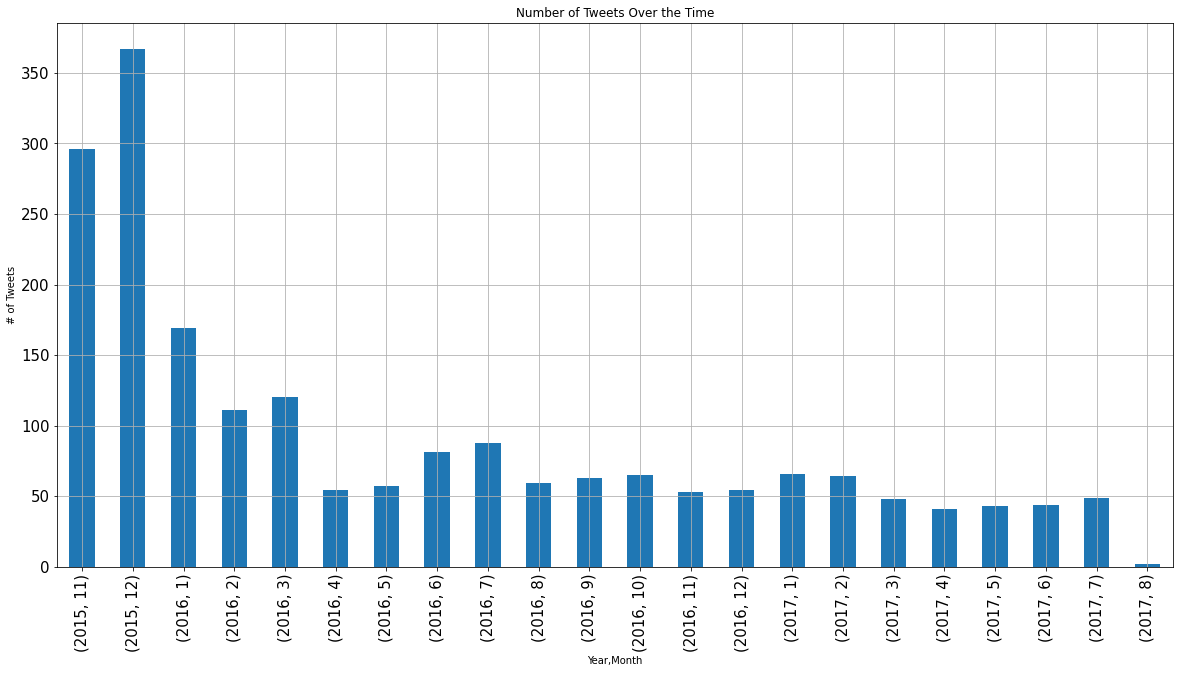

In [344]:
#Plotting tweet count over time
temp_df = master_df.tweet_id.groupby([master_df["timestamp"].rename('Year').dt.year, master_df["timestamp"].rename('Month').dt.month]).count()

# Set kind Bar or Line 
temp_df.plot(kind='bar', figsize=(20,10),grid=True, fontsize =15,x='timestamp',title = 'Number of Tweets Over the Time').set_ylabel('# of Tweets')
ax = plt.gca()
# ax.set(xlim=(0), ylim=(0))
plt.show();

We can see the most number of tweets being in December 2015 followed closely by November 2015

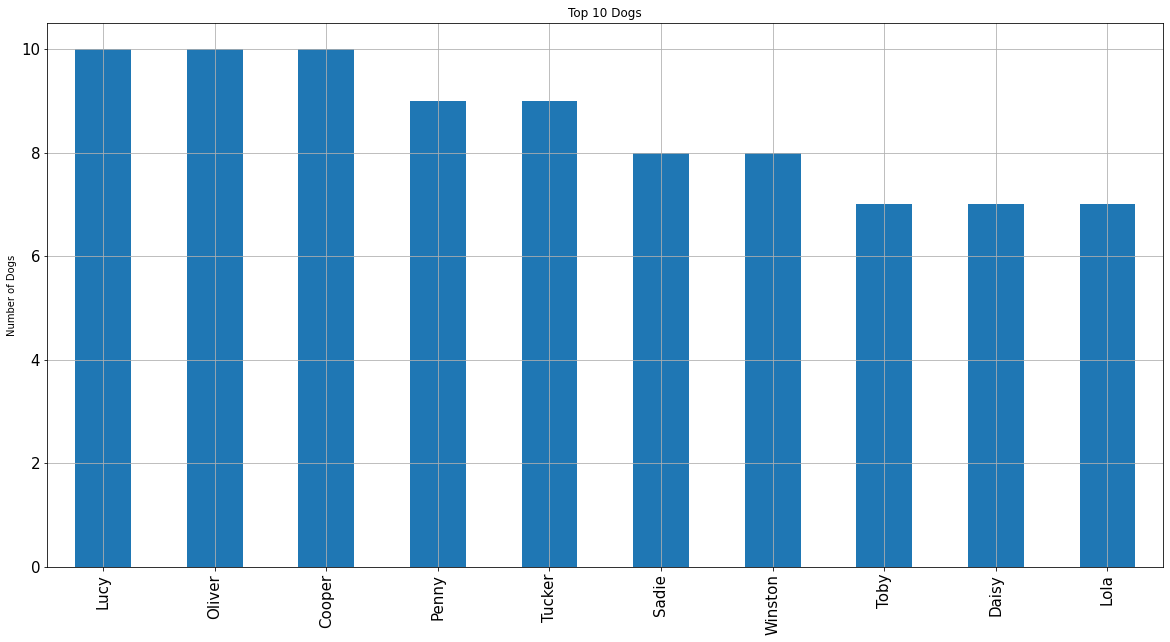

In [345]:
# Finding most popular dogs

temp_df = master_df.name.value_counts()[1:11]

temp_df.plot(kind='bar', figsize=(20,10),grid=True, fontsize =15,title = 'Top 10 Dogs').set_ylabel('Number of Dogs');
 
plt.show()

Here we notice that Lucy, Oliver and Cooper were the 3 most popular dogs

<AxesSubplot:>

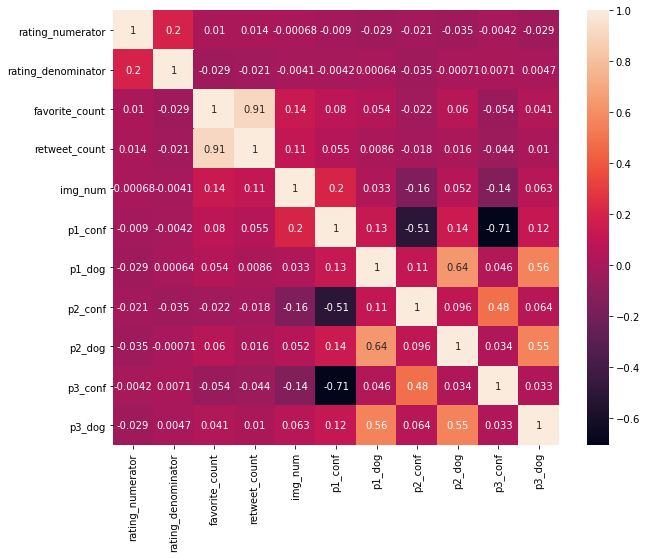

In [351]:
# Using seaborn's heat maps to observe linear correlations between characterizations
plt.figure(figsize=(10, 8))
feature_corr = master_df.corr()
sns.heatmap(feature_corr, annot=True)

We notice that The favorite count and retweet count have highly positive correlation (0.91).

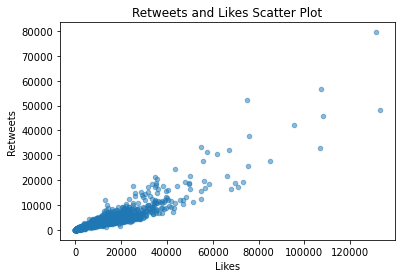

In [29]:
#Retweets compared to Likes

master_df_analysis.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter Plot')

plt.savefig('Retweets_vs_Likes.png', bbox_inches='tight');

Here we can observe the retweets being positevely correlated with likes which we already noticed in the heat maps produced earlier

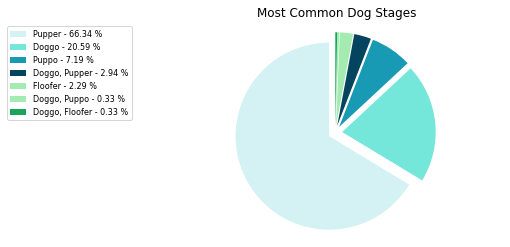

In [28]:
# A pie chart visualizing most common dog 'stages'
x = np.char.array(['Pupper', 'Doggo', 'Puppo', 'Doggo, Pupper', 'Floofer', 'Doggo, Puppo', 'Doggo, Floofer'])
y = np.array(list(master_df_analysis[master_df_analysis['stage'] != 'None']['stage'].value_counts())[0:7])
colors = ['#D4F1F4','#75E6DA','#189AB4','#05445E','#A3EBB1','#A3EBB1','#18A558']
pct = 100.*y/y.sum()
explode = (0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3) 
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=4,  explode = explode)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, pct)]
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.axis('equal')
plt.title('Most Common Dog Stages');

We can observe that 'Pupper' was the most common stage at 66.34% followed by 'Doggo' at 20.59%